In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [192]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [193]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot: xlabel='Date'>

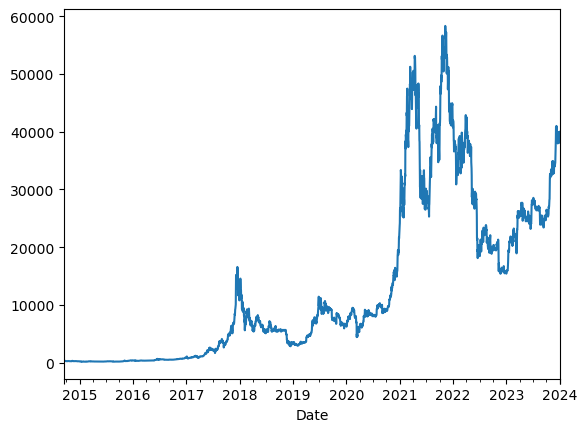

In [194]:
bitcoin['Close'].plot()

In [195]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01',
               '2024-01-02', '2024-01-03'],
              dtype='datetime64[ns]', name='Date', length=3396, freq=None)

/tmp/ipykernel_7531/1704158785.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2023']['Close'].plot()


<AxesSubplot: xlabel='Date'>

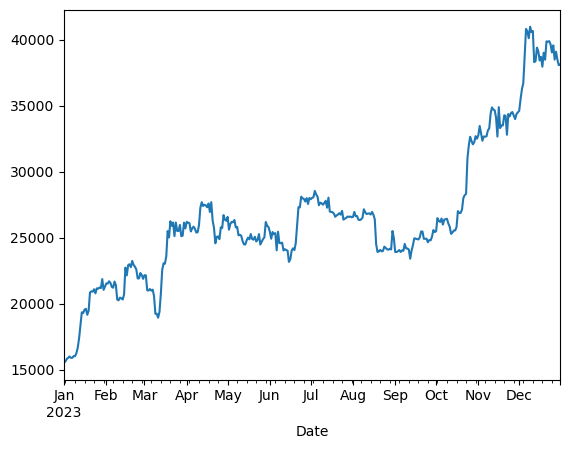

In [196]:
bitcoin['2023']['Close'].plot()

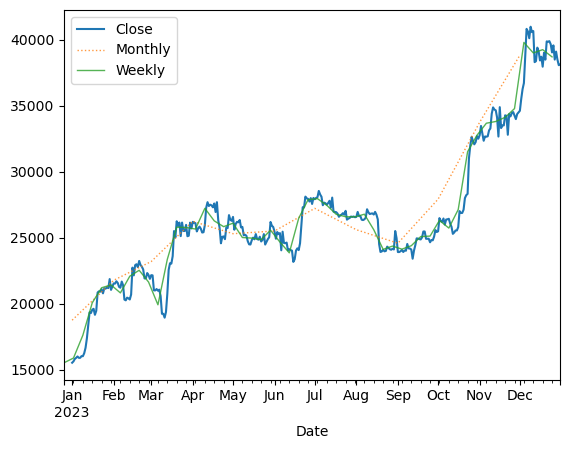

In [197]:
plt.figure()
bitcoin.loc['2023']['Close'].plot()
bitcoin.loc['2023']['Close'].resample('M').mean().plot(label='Monthly', lw=1, ls=':', alpha=.8)
bitcoin.loc['2023']['Close'].resample('W').mean().plot(label='Weekly', lw=1, ls='-', alpha=.8)
plt.legend()

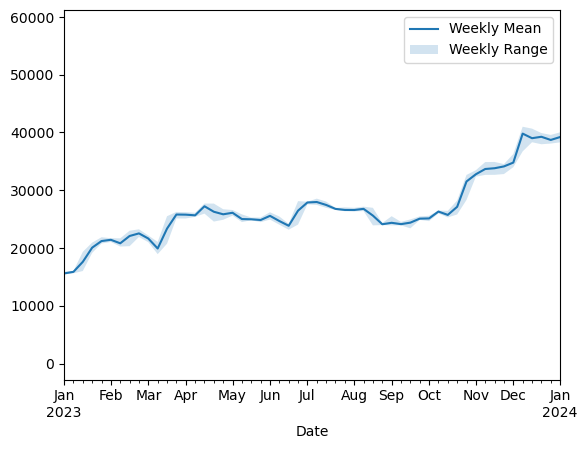

In [198]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure()
m['mean']['2023':].plot(label='Weekly Mean')
plt.fill_between(m.index, m['max'], m['min'], alpha=.2, label='Weekly Range')
plt.legend()

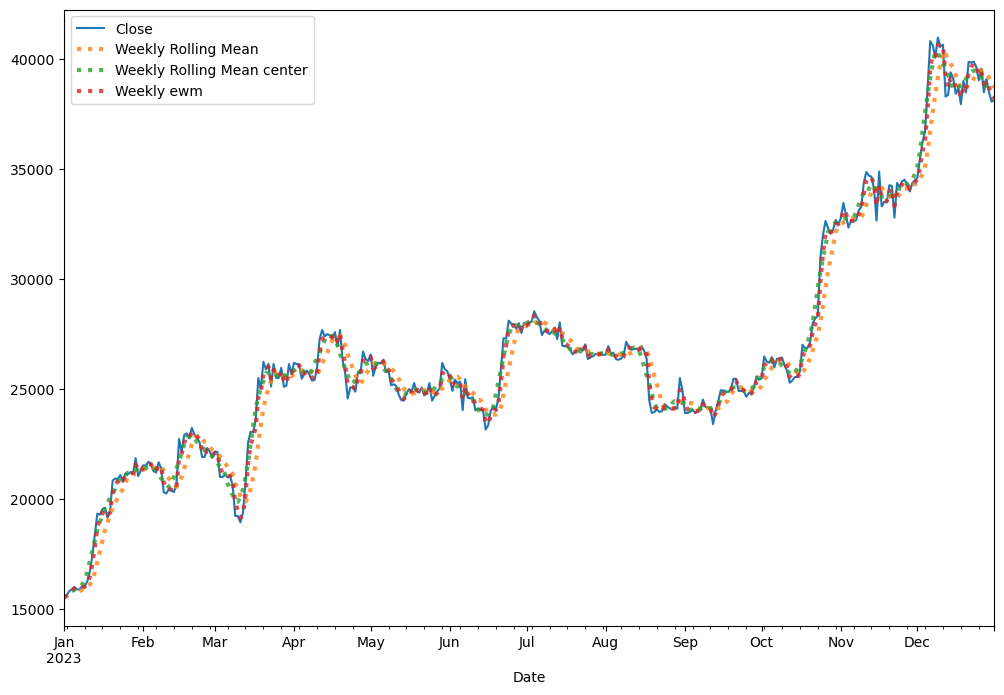

In [199]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2023', 'Close'].plot()
bitcoin.loc['2023', 'Close'].rolling(window=7).mean().plot(label='Weekly Rolling Mean', lw=3, ls=':', alpha=.8)
bitcoin.loc['2023', 'Close'].rolling(window=7, center=True).mean().plot(label='Weekly Rolling Mean center', lw=3, ls=':', alpha=.8)
bitcoin.loc['2023', 'Close'].ewm(alpha=0.6).mean().plot(label='Weekly ewm', lw=3, ls=':', alpha=.8)
plt.legend()

In [200]:
eth = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [201]:
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


In [202]:
crypto = pd.merge(bitcoin, eth, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

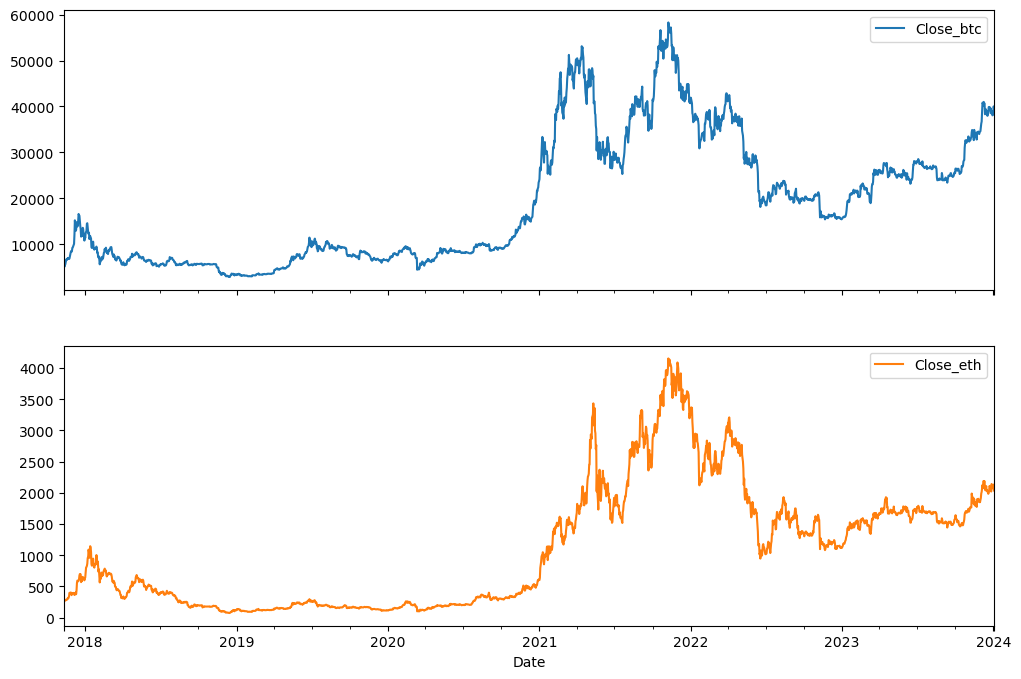

In [203]:
crypto[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

In [204]:
crypto[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.929194
Close_eth,0.929194,1.000000


In [205]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot: xlabel='Date'>

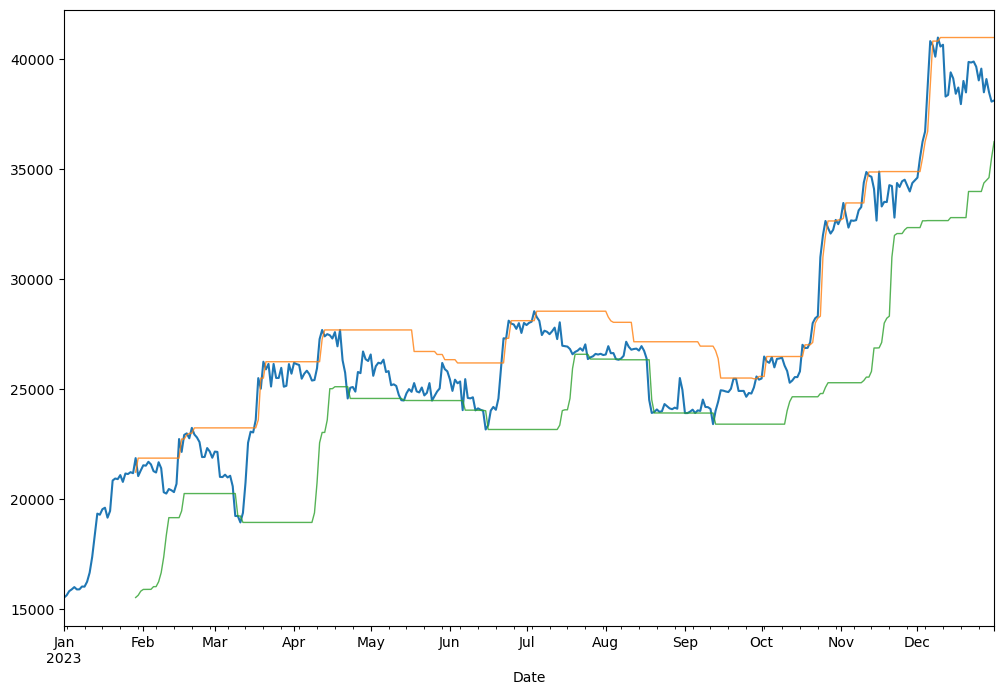

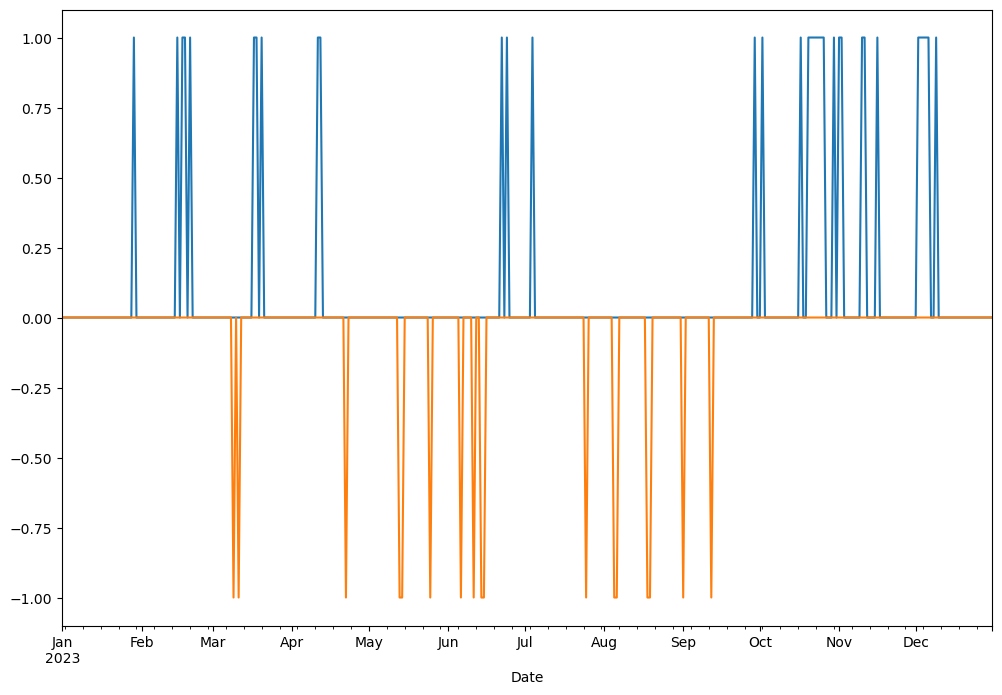

In [212]:
plt.figure(figsize=(12, 8))

bitcoin['Buy'] = np.zeros(len(bitcoin))
bitcoin['Sell'] = np.zeros(len(bitcoin))

bitcoin.loc['2023', 'Close'].plot(label='Bitcoin2023')

bitcoin['RollingMax'] = bitcoin.loc['2023', 'Close'].shift(1).rolling(window=28).max()
bitcoin['RollingMin'] = bitcoin.loc['2023', 'Close'].shift(1).rolling(window=28).min()

bitcoin.loc['2023', 'RollingMax'].plot(label='Max 4 weeks', lw=1, alpha=.8)
bitcoin.loc['2023', 'RollingMin'].plot(label='Min 4 weeks', lw=1, alpha=.8)

bitcoin.loc[bitcoin['Close'] > bitcoin['RollingMax'], 'Buy'] = 1
bitcoin.loc[bitcoin['Close'] < bitcoin['RollingMin'], 'Sell'] = -1

plt.figure(figsize=(12, 8))
bitcoin.loc['2023', 'Buy'].plot(label='Buy')
bitcoin.loc['2023', 'Sell'].plot(label='Sell')